In [1]:
import numpy as np
import urllib

In [2]:
data = np.load("../data/alphafold/range_100.npy")


In [3]:
print(data)

[]


In [10]:
uniprot_id = "X5IWT5"
download = f"https://alphafold.ebi.ac.uk/files/AF-{uniprot_id}-F1-model_v2.pdb" 
file_name = uniprot_id + ".pdb"
urllib.request.urlretrieve(download, file_name)

('X5IWT5.pdb', <http.client.HTTPMessage at 0x12fb5b7f0>)

In [8]:
import MDAnalysis as mdA

/Users/jasminguven/miniforge3/envs/jupyterlab/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
u = mdA.Universe(file_name)

/Users/jasminguven/miniforge3/envs/jupyterlab/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:429: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


In [12]:
u.segments.segids

array(['A'], dtype=object)

In [15]:
u.select_atoms("altLoc ")

SelectionError: Selection failed: 'Unexpected token 'None''

In [8]:
import matplotlib.pyplot as plt

In [13]:
hist_data = np.load("../data/alphafold/histogram_100.npy", allow_pickle=True)

In [14]:
hist_data

array([[0.21499014, 0.21301775, 0.12426036, ..., 0.        , 0.        ,
        0.        ],
       [0.24433249, 0.2418136 , 0.11335013, ..., 0.00251889, 0.        ,
        0.        ],
       [0.23265306, 0.23061224, 0.08571429, ..., 0.00204082, 0.        ,
        0.00408163],
       ...,
       [0.21171171, 0.20945946, 0.11486486, ..., 0.        , 0.        ,
        0.        ],
       [0.22838137, 0.22616408, 0.11086475, ..., 0.        , 0.        ,
        0.        ],
       [0.24189526, 0.2394015 , 0.10473815, ..., 0.        , 0.        ,
        0.        ]])

In [15]:
hist_data[0]

array([0.21499014, 0.21301775, 0.12426036, 0.11045365, 0.03747535,
       0.02366864, 0.01577909, 0.01183432, 0.00986193, 0.00986193,
       0.01380671, 0.01183432, 0.00394477, 0.00394477, 0.00788955,
       0.01183432, 0.00394477, 0.00591716, 0.00591716, 0.00591716,
       0.00591716, 0.00788955, 0.00394477, 0.00394477, 0.00591716,
       0.00591716, 0.00197239, 0.00394477, 0.00394477, 0.00591716,
       0.00591716, 0.        , 0.        , 0.00197239, 0.00197239,
       0.        , 0.00197239, 0.        , 0.        , 0.        ,
       0.00394477, 0.00197239, 0.00394477, 0.00394477, 0.00197239,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00197239, 0.00197239, 0.00394477,
       0.00394477, 0.00394477, 0.00394477, 0.00394477, 0.00394477,
       0.00394477, 0.00394477, 0.00394477, 0.00197239, 0.00197239,
       0.00197239, 0.        , 0.00197239, 0.00394477, 0.00591716,
       0.00591716, 0.00197239, 0.        , 0.        , 0.00394

[]

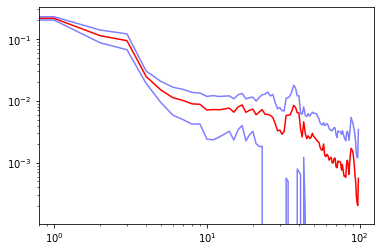

In [16]:
mean = np.mean(hist_data, axis=0)
std = np.std(hist_data, axis=0)
plt.plot(mean, 'r')
plt.plot(mean+std, 'b', alpha=0.5)
plt.plot(mean-std, 'b', alpha=0.5)
plt.loglog()

(0.0005, 0.2)

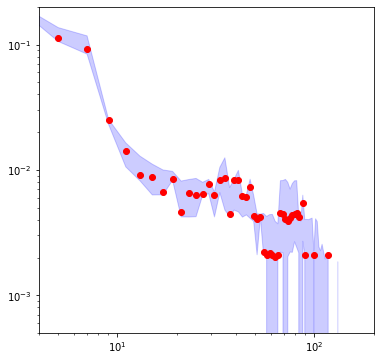

In [18]:
distance_distribution_array = np.linspace(start=1, stop=200, num=100)
lower, median, upper = np.quantile(hist_data, [0.33,0.5,0.66], axis=0)
fig = plt.figure(figsize=(6,6))
median = np.median(hist_data, axis=0)
plt.plot(np.array(distance_distribution_array[:-1]),median, 'r', marker = 'o', lw = 0)
plt.fill_between(np.array(distance_distribution_array[:-1]), np.array(upper), np.array(lower),color= 'b', alpha=0.2)
#plt.plot(lower, 'b', alpha=0.5)
#plt.plot(mean, 'g')
#plt.plot(mean+std, 'orange', alpha=0.5)
#plt.plot(mean-std, 'orange', alpha=0.5)
plt.loglog()
plt.xlim(4,200)
plt.ylim(0.0005,0.2)

In [19]:
hist_data = np.load("../data/alphafold/histogram_200.npy", allow_pickle=True)

[]

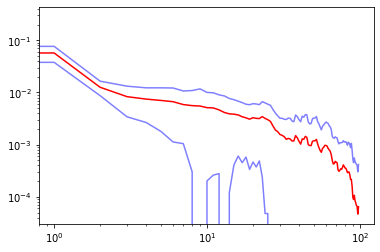

In [20]:
mean = np.mean(hist_data, axis=0)
std = np.std(hist_data, axis=0)
plt.plot(mean, 'r')
plt.plot(mean+std, 'b', alpha=0.5)
plt.plot(mean-std, 'b', alpha=0.5)
plt.loglog()

(0.0001, 0.2)

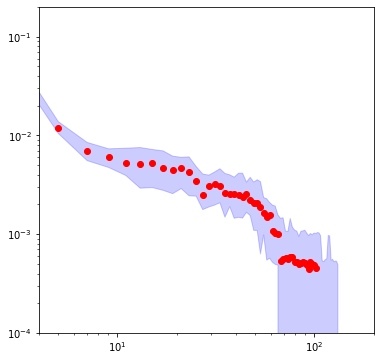

In [22]:
distance_distribution_array = np.linspace(start=1, stop=200, num=100)
lower, median, upper = np.quantile(hist_data, [0.33,0.5,0.66], axis=0)
fig = plt.figure(figsize=(6,6))
median = np.median(hist_data, axis=0)
plt.plot(np.array(distance_distribution_array[:-1]),median, 'r', marker = 'o', lw = 0)
plt.fill_between(np.array(distance_distribution_array[:-1]), np.array(upper), np.array(lower),color= 'b', alpha=0.2)
#plt.plot(lower, 'b', alpha=0.5)
#plt.plot(mean, 'g')
#plt.plot(mean+std, 'orange', alpha=0.5)
#plt.plot(mean-std, 'orange', alpha=0.5)
plt.loglog()
plt.xlim(4,200)
plt.ylim(0.0001,0.2)

In [23]:
hist_data = np.load("../data/alphafold/histogram_300.npy", allow_pickle=True)

[]

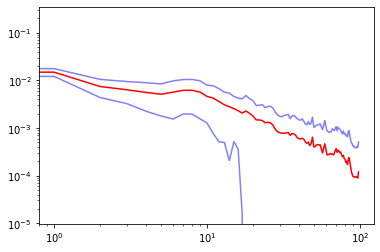

In [24]:
mean = np.mean(hist_data, axis=0)
std = np.std(hist_data, axis=0)
plt.plot(mean, 'r')
plt.plot(mean+std, 'b', alpha=0.5)
plt.plot(mean-std, 'b', alpha=0.5)
plt.loglog()

(0.0001, 0.2)

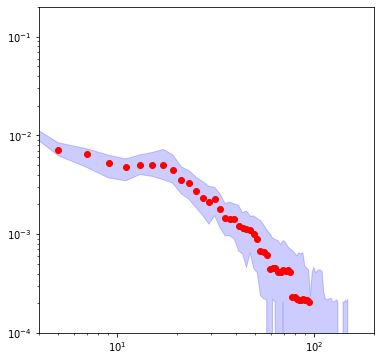

In [25]:
distance_distribution_array = np.linspace(start=1, stop=200, num=100)
lower, median, upper = np.quantile(hist_data, [0.33,0.5,0.66], axis=0)
fig = plt.figure(figsize=(6,6))
median = np.median(hist_data, axis=0)
plt.plot(np.array(distance_distribution_array[:-1]),median, 'r', marker = 'o', lw = 0)
plt.fill_between(np.array(distance_distribution_array[:-1]), np.array(upper), np.array(lower),color= 'b', alpha=0.2)
#plt.plot(lower, 'b', alpha=0.5)
#plt.plot(mean, 'g')
#plt.plot(mean+std, 'orange', alpha=0.5)
#plt.plot(mean-std, 'orange', alpha=0.5)
plt.loglog()
plt.xlim(4,200)
plt.ylim(0.0001,0.2)